# CSCI 5980 MultiCoNER II - error analysis
Asal, Ku, London, Josh

## imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# import os # os.scandir
from collections import Counter
# import pandas as pd # not used
# from tqdm import tqdm
# import matplotlib.pyplot as plt

Mounted at /content/drive


## define files

In [47]:
path = '/content/drive/Shareddrives/CSCI 5980-01 F22/predictions and differences/'

diff_files = [
  'no augmentation baseline/en.diff',
  'base_en_20.diff',
  'base_en-full_20.diff',
  'base_en-melm_20.diff',
  'base_en-partial_20.diff',
  'base_en-stable-full_20.diff',
  'base_en-stable-partial_20.diff',
  'no augmentation baseline/fr.diff',
  'base_fr_20.diff',
  'base_fr-full_20.diff',
  'base_fr-melm_20.diff',
  'base_fr-partial_20.diff',
  'base_fr-stable-full_20.diff',
  'base_fr-stable-partial_20.diff',
]

In [ ]:
with open(path + 'base_en_20.conll') as file:
  for line in file:
    print(line, end='')

In [ ]:
with open(path + 'base_en_20.diff') as file:
  for line in file:
    print(line, end='')

## process files, find what's most meaningful

In [ ]:
# combined := remove B- and I- from labels
# unordered := mixes up ground truth and predictions, DON'T WANT, DON'T USE

def get_counter_from_diff(diff_file):
  real = []
  real_combined = [] # all ground truth
  real_without_O = [] # all ground truth except for if absence of entity label 'O'
  real_without_O_combined = []
  pred = []
  pred_combined = []
  pred_without_real_O = [] # all predictions except for if real is absence of entity label 'O' # NOTE: this included predictions of 'O'
  pred_without_real_O_combined = []
  # just for mistakes
  real_mistake_combined = [] # all ground truth mistakes
  pred_mistake_combined = []

  counter_correct = Counter()
  counter_different = Counter()

  # same except don't distinguish between B- and I-
  counter_correct_combined = Counter()
  counter_different_combined = Counter()

  """
  # same except don't care about order of tag mismatch - not used
  counter_correct_unordered = Counter() # no meaning, they're the same - unused
  counter_different_unordered = Counter()

  # both of the above
  counter_different_combined_unordered = Counter()
  """

  # only care about each individual tag
  # counter_correct_individual = Counter() # NOT USED
  counter_different_individual = Counter() #  CHANGE THIS, ONLY CARE ABOUT GROUND TRUTH

  # counter_correct_individual_combined = Counter() # NOT USED
  counter_different_individual_combined = Counter() # CHANGE THIS, ONLY CARE ABOUT GROUND TRUTH

  with open(diff_file) as file:
    for line in file:
      line = line.split()
      if (len(line) == 0) or (line[0] == '#'): # empty lines and headers
        continue

      real.append(line[1])
      real_combined.append(line[1][2:])
      pred.append(line[2])
      pred_combined.append(line[2][2:])
      if line[1] != 'O': # remove dominant case when ground truth is absense of entity label 'O'
        real_without_O.append(line[1])
        real_without_O_combined.append(line[1][2:])
        pred_without_real_O.append(line[2])
        pred_without_real_O_combined.append(line[2][2:])

      # correctly predicted
      if line[1] == line[2]:
        counter_correct[ line[1] ] += 1
        counter_correct_combined[ line[1][2:] ] += 1
      
      # incorrectly predicted
      else: # line[1] != line[2]
        counter_different[ (line[1], line[2]) ] += 1
        counter_different_combined[ (line[1][2:], line[2][2:]) ] += 1

        real_mistake_combined.append(line[1][2:])
        pred_mistake_combined.append(line[2][2:])

        """
        # unordered
        if line[1] < line[2]:
          counter_different_unordered[ (line[1], line[2]) ] += 1
        else: # line[1] > line[2]
          counter_different_unordered[ (line[2], line[1]) ] += 1

        # combined unordered
        if line[1][2:] < line[2][2:]:
          counter_different_combined_unordered[ (line[1][2:], line[2][2:]) ] += 1
        else: # line[1][2:] > line[2][2:]
          counter_different_combined_unordered[ (line[2][2:], line[1][2:]) ] += 1
        """

        # individual tags
        counter_different_individual[ line[1] ] += 1
        # counter_different_individual[ line[2] ] += 1 # CHANGE THIS, ONLY CARE ABOUT GROUND TRUTH
        counter_different_individual_combined[ line[1][2:] ] += 1
        # counter_different_individual_combined[ line[2][2:] ] += 1 # CHANGE THIS, ONLY CARE ABOUT GROUND TRUTH


  return (real, real_combined, pred, pred_combined,
          real_without_O, real_without_O_combined, pred_without_real_O, pred_without_real_O_combined,
          real_mistake_combined, pred_mistake_combined,
          counter_correct, counter_different, counter_correct_combined, counter_different_combined,
          # counter_different_unordered, counter_different_combined_unordered,
          counter_different_individual, counter_different_individual_combined)

In [ ]:
(real, real_combined, pred, pred_combined,
 real_without_O, real_without_O_combined, pred_without_real_O, pred_without_real_O_combined,
 real_mistake_combined, pred_mistake_combined,
 pairs_same, pairs_diff, pairs_same_combined, pairs_diff_combined,
 # pairs_diff_unordered, pairs_diff_combined_unordered,
 each_diff, each_diff_combined) = get_counter_from_diff(path + 'base_en_20.diff')

In [ ]:
pairs_same.most_common(20)

[('O', 10363),
 ('I-Artist', 188),
 ('B-Artist', 179),
 ('I-VisualWork', 88),
 ('B-HumanSettlement', 86),
 ('I-ORG', 76),
 ('I-WrittenWork', 74),
 ('I-MusicalWork', 70),
 ('I-OtherPER', 68),
 ('B-Athlete', 60),
 ('I-HumanSettlement', 60),
 ('I-Athlete', 59),
 ('B-OtherPER', 45),
 ('B-ORG', 44),
 ('I-Facility', 42),
 ('B-WrittenWork', 40),
 ('B-VisualWork', 38),
 ('B-MusicalWork', 37),
 ('B-Facility', 33),
 ('I-SportsGRP', 32)]

In [ ]:
pairs_same_combined.most_common(20)

[('', 10363),
 ('Artist', 367),
 ('HumanSettlement', 146),
 ('VisualWork', 126),
 ('ORG', 120),
 ('Athlete', 119),
 ('WrittenWork', 114),
 ('OtherPER', 113),
 ('MusicalWork', 107),
 ('Facility', 75),
 ('SportsGRP', 59),
 ('Politician', 50),
 ('MusicalGRP', 50),
 ('OtherPROD', 33),
 ('Station', 32),
 ('Software', 24),
 ('OtherLOC', 24),
 ('PublicCorp', 22),
 ('Vehicle', 20),
 ('ArtWork', 17)]

In [ ]:
pairs_diff.most_common(20)

[(('I-OtherPER', 'I-Artist'), 19),
 (('B-OtherPROD', 'O'), 18),
 (('I-VisualWork', 'O'), 17),
 (('B-OtherPER', 'B-Artist'), 16),
 (('I-ORG', 'O'), 15),
 (('I-OtherPROD', 'O'), 14),
 (('I-MusicalWork', 'O'), 14),
 (('I-Artist', 'I-OtherPER'), 14),
 (('B-ORG', 'O'), 14),
 (('I-Politician', 'I-Artist'), 13),
 (('B-Artist', 'B-OtherPER'), 13),
 (('I-OtherPER', 'I-Politician'), 12),
 (('B-OtherPER', 'B-Athlete'), 12),
 (('I-OtherPER', 'I-Athlete'), 12),
 (('B-Politician', 'B-Artist'), 12),
 (('B-VisualWork', 'O'), 12),
 (('O', 'I-WrittenWork'), 11),
 (('B-Politician', 'B-OtherPER'), 10),
 (('I-Politician', 'I-OtherPER'), 10),
 (('B-OtherPER', 'B-Politician'), 9)]

In [ ]:
pairs_diff_combined.most_common(20)

[(('OtherPER', 'Artist'), 35),
 (('OtherPROD', ''), 32),
 (('VisualWork', ''), 29),
 (('ORG', ''), 29),
 (('Artist', 'OtherPER'), 27),
 (('Politician', 'Artist'), 26),
 (('OtherPER', 'Politician'), 25),
 (('OtherPER', 'Athlete'), 25),
 (('MusicalWork', ''), 23),
 (('Politician', 'OtherPER'), 20),
 (('', 'WrittenWork'), 19),
 (('', 'VisualWork'), 17),
 (('Disease', ''), 17),
 (('', 'MusicalWork'), 16),
 (('', 'Artist'), 15),
 (('WrittenWork', ''), 14),
 (('Athlete', 'Artist'), 14),
 (('Software', 'VisualWork'), 14),
 (('', 'Facility'), 13),
 (('PublicCorp', 'ORG'), 13)]

In [ ]:
# removed, these combine and confused ground truth and predictions
"""
pairs_diff_unordered.most_common(20)
pairs_diff_combined_unordered.most_common(20)
"""

'\npairs_diff_unordered.most_common(20)\npairs_diff_combined_unordered.most_common(20)\n'

In [ ]:
each_diff.most_common(20)

[('O', 207),
 ('I-OtherPER', 54),
 ('B-OtherPER', 46),
 ('I-MusicalWork', 38),
 ('I-VisualWork', 34),
 ('B-ORG', 34),
 ('B-Artist', 33),
 ('B-OtherPROD', 32),
 ('I-Politician', 32),
 ('I-ORG', 32),
 ('B-Politician', 31),
 ('I-Artist', 29),
 ('I-OtherPROD', 26),
 ('B-MusicalWork', 24),
 ('B-HumanSettlement', 23),
 ('B-VisualWork', 23),
 ('I-Facility', 22),
 ('B-Athlete', 19),
 ('I-Athlete', 19),
 ('B-Facility', 19)]

In [ ]:
each_diff_combined.most_common(20)

[('', 207),
 ('OtherPER', 100),
 ('ORG', 66),
 ('Politician', 63),
 ('Artist', 62),
 ('MusicalWork', 62),
 ('OtherPROD', 58),
 ('VisualWork', 57),
 ('Facility', 41),
 ('Athlete', 38),
 ('HumanSettlement', 35),
 ('MusicalGRP', 33),
 ('PublicCorp', 31),
 ('WrittenWork', 30),
 ('Software', 29),
 ('SportsGRP', 28),
 ('Disease', 25),
 ('OtherLOC', 24),
 ('Cleric', 23),
 ('Scientist', 21)]

## confusion matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay, classification_report
# confusion_matrix creates the matrix in the order the classes appear in y_true

In [48]:
print( len(real), len(pred), confusion_matrix(real, pred).shape )
print( len(real_combined), len(pred_combined), confusion_matrix(real_combined, pred_combined).shape )

print( len(real_without_O), len(pred_without_real_O), confusion_matrix(real_without_O, pred_without_real_O).shape )
print( len(real_without_O_combined), len(pred_without_real_O_combined), confusion_matrix(real_without_O_combined, pred_without_real_O_combined).shape )

13062 13062 (67, 67)
13062 13062 (34, 34)
2632 2632 (67, 67)
2632 2632 (34, 34)


In [ ]:
print( classification_report(real, pred) )

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

B-AerospaceManufacturer       0.67      0.40      0.50        10
  B-AnatomicalStructure       0.62      0.59      0.61        17
              B-ArtWork       0.55      0.46      0.50        13
               B-Artist       0.71      0.84      0.77       212
              B-Athlete       0.70      0.76      0.73        79
      B-CarManufacturer       0.73      0.85      0.79        13
               B-Cleric       0.50      0.20      0.29        15
             B-Clothing       0.33      0.40      0.36        10
              B-Disease       0.50      0.39      0.44        18
                B-Drink       0.50      0.82      0.62        11
             B-Facility       0.55      0.63      0.59        52
                 B-Food       0.50      0.37      0.42        19
      B-HumanSettlement       0.83      0.79      0.81       109
     B-MedicalProcedure       0.42      0.38      0.40        13
   B-Medication/Vaccine 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print( classification_report(real_combined, pred_combined) )

                       precision    recall  f1-score   support

                            0.97      0.98      0.98     10570
AerospaceManufacturer       0.80      0.47      0.59        17
  AnatomicalStructure       0.53      0.48      0.50        21
              ArtWork       0.58      0.51      0.55        35
               Artist       0.73      0.87      0.80       429
              Athlete       0.71      0.76      0.74       157
      CarManufacturer       0.76      0.68      0.72        19
               Cleric       0.67      0.26      0.37        31
             Clothing       0.38      0.42      0.40        12
              Disease       0.62      0.40      0.48        40
                Drink       0.42      0.85      0.56        13
             Facility       0.59      0.66      0.62       116
                 Food       0.58      0.39      0.47        28
      HumanSettlement       0.85      0.81      0.83       181
     MedicalProcedure       0.53      0.45      0.49  

In [ ]:
print( classification_report(real_without_O, pred_without_real_O) )

                         precision    recall  f1-score   support

B-AerospaceManufacturer       0.67      0.40      0.50        10
  B-AnatomicalStructure       0.91      0.59      0.71        17
              B-ArtWork       0.86      0.46      0.60        13
               B-Artist       0.74      0.84      0.79       212
              B-Athlete       0.71      0.76      0.74        79
      B-CarManufacturer       0.79      0.85      0.81        13
               B-Cleric       0.50      0.20      0.29        15
             B-Clothing       0.80      0.40      0.53        10
              B-Disease       0.78      0.39      0.52        18
                B-Drink       0.64      0.82      0.72        11
             B-Facility       0.62      0.63      0.63        52
                 B-Food       0.64      0.37      0.47        19
      B-HumanSettlement       0.91      0.79      0.84       109
     B-MedicalProcedure       0.56      0.38      0.45        13
   B-Medication/Vaccine 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
print( classification_report(real_without_O_combined, pred_without_real_O_combined) )

                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.80      0.47      0.59        17
  AnatomicalStructure       0.91      0.48      0.62        21
              ArtWork       0.82      0.51      0.63        35
               Artist       0.75      0.87      0.81       429
              Athlete       0.72      0.76      0.74       157
      CarManufacturer       0.81      0.68      0.74        19
               Cleric       0.67      0.26      0.37        31
             Clothing       0.83      0.42      0.56        12
              Disease       0.84      0.40      0.54        40
                Drink       0.52      0.85      0.65        13
             Facility       0.66      0.66      0.66       116
                 Food       0.69      0.39      0.50        28
      HumanSettlement       0.92      0.81      0.86       181
     MedicalProcedure       0.67      0.45      0.54  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


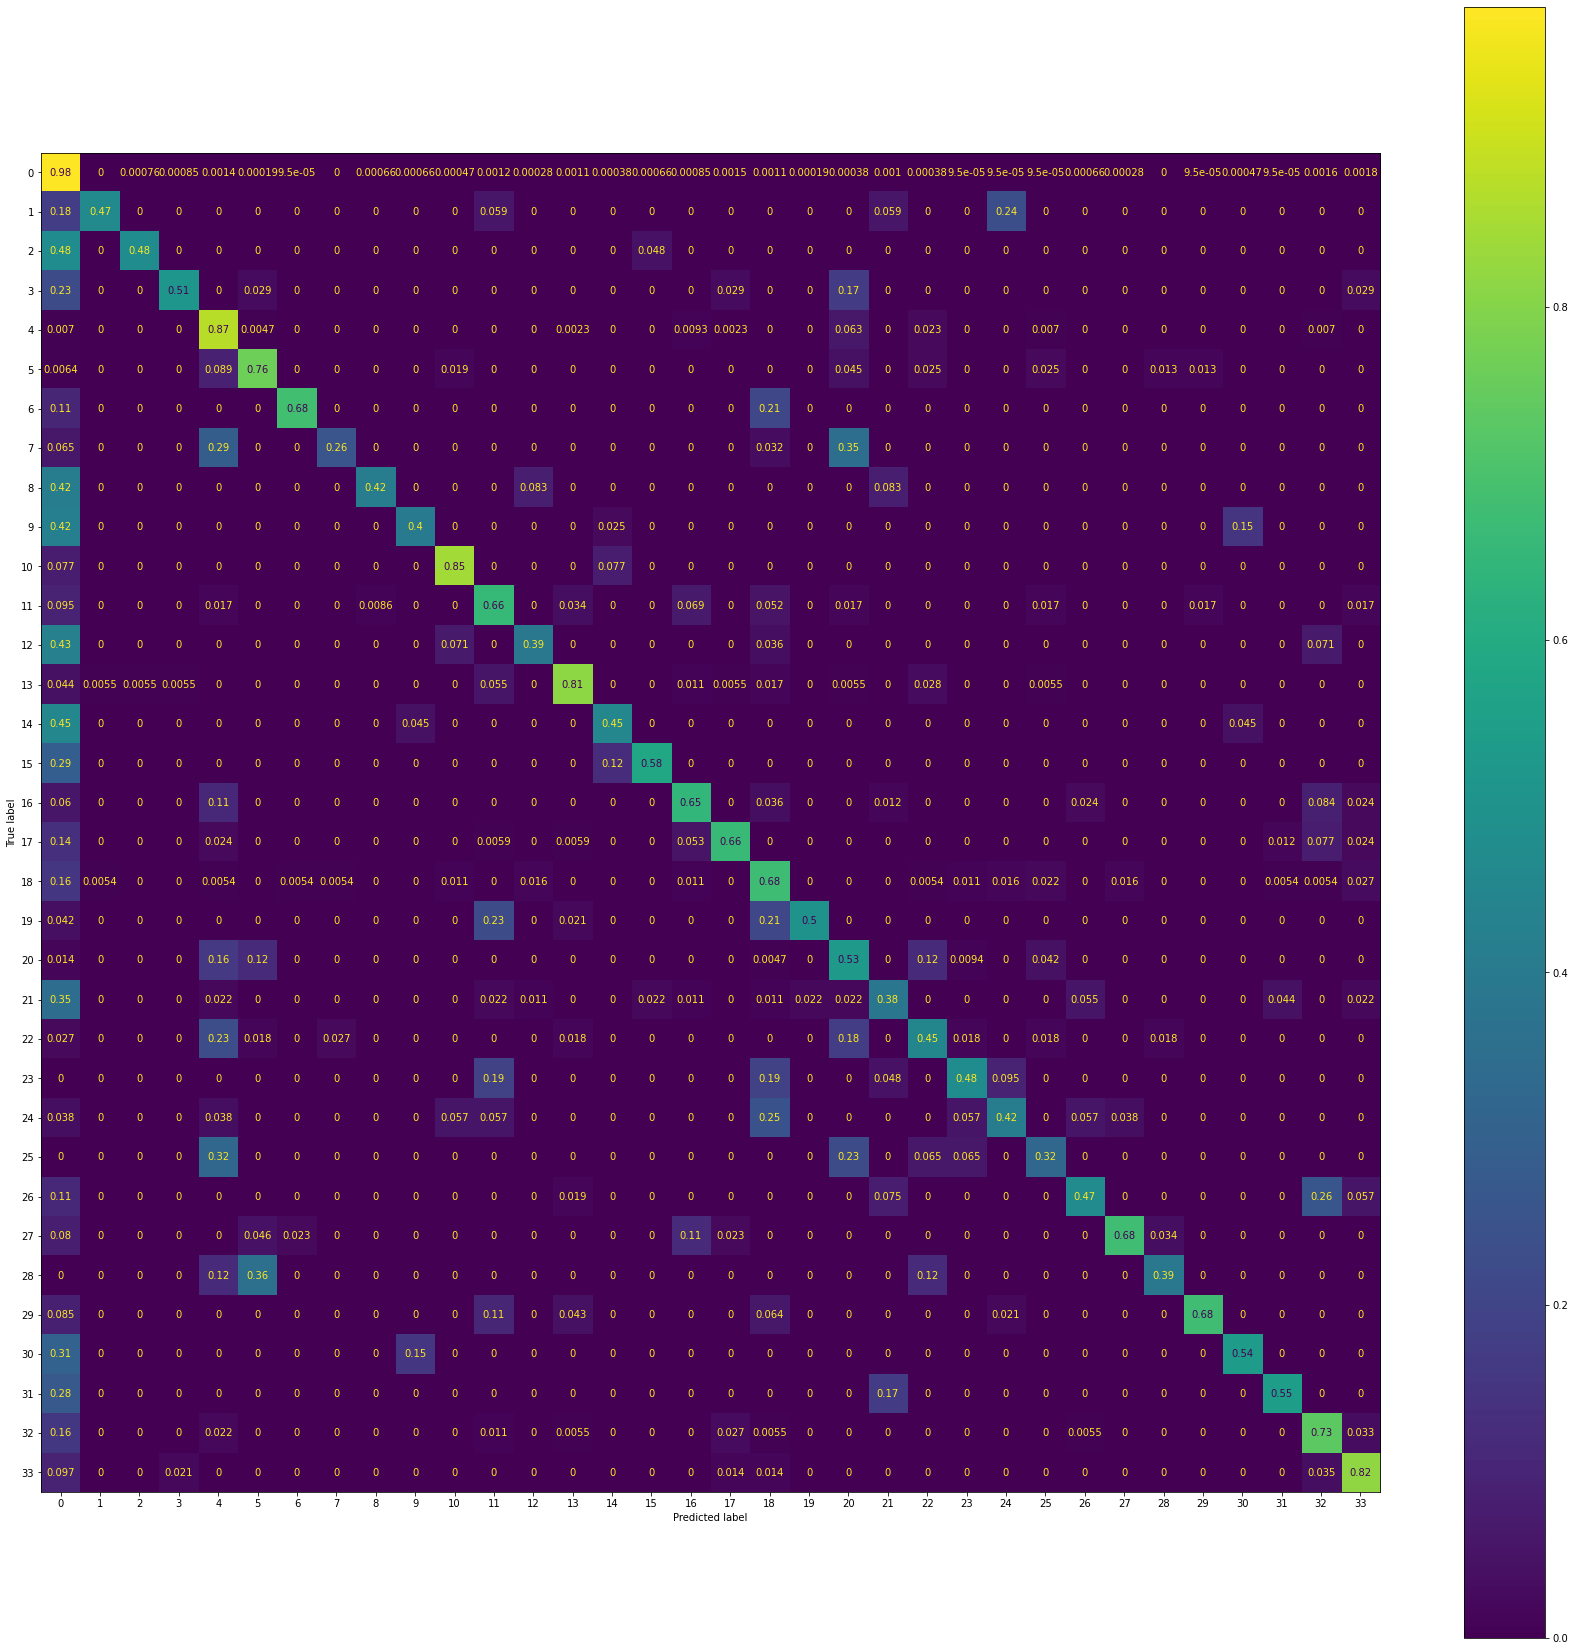

In [ ]:
plt.rcParams['figure.figsize'] = (30,30)

cm = confusion_matrix(real_combined, pred_combined, normalize='true') # real_without_O_combined, pred_without_real_O_combined # real_combined, pred_combined # real_mistake_combined, pred_mistake_combined) # , normalize='true') # , labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # , display_labels=clf.classes_)
disp.plot()
plt.show()

## process all files

Separated labels (including B- and I-), combined labels (excluding B- and I-)

| augmentation technique | macro-f1 |
| - | - |
| base_en_20 |
| base_en-full_20 |
| base_en-melm_20 |
| base_en-partial_20 |
| base_en-stable-full_20 |
| base_en-stable-partial_20 |
| base_fr_20 |
| base_fr-full_20 |
| base_fr-melm_20 |
| base_fr-partial_20 |
| base_fr-stable-full_20 |
| base_fr-stable-partial_20 |

| augmentation technique | w/ null label 'O'<br><br>combined | <br><br>w/ B-, I- | w/o null label 'O'<br><br>combined | <br><br>w/ B-, I- |
| - | - | - | - | - |
| en_no_augmentation_baseline | 0.57 | 0.52 | 0.58 | 0.54 |
| base_en_20 | 0.59 | 0.55 | 0.60 | 0.56 |
| base_en-full_20 | **0.61** | **0.57** | **0.62** | **0.59** |
| base_en-melm_20 | 0.55 | 0.52 | 0.57 | 0.55 |
| base_en-partial_20 | 0.59 | 0.54 | 0.60 | 0.56 |
| base_en-stable-full_20 | 0.58 | 0.54 | 0.58 | 0.56 |
| base_en-stable-partial_20 | 0.58 | 0.53 | 0.59 | 0.55 |
| fr_no_augmentation_baseline | 0.61 | 0.58 | 0.62 | 0.59 |
| base_fr_20 | 0.63 | 0.59 | 0.63 | 0.61 |
| base_fr-full_20 | 0.61 | 0.57 | 0.62 | 0.59 |
| base_fr-melm_20 | 0.59 | 0.56 | 0.59 | 0.58 |
| base_fr-partial_20 | **0.65** | **0.63** | **0.66** | **0.65** |
| base_fr-stable-full_20 | 0.63 | 0.59 | 0.64 | 0.62 |
| base_fr-stable-partial_20 | 0.64 | 0.63 | 0.64 | 0.64 |

- base_en-stable-full_20 and base_en-stable-partial_20 supposed to be best?

no augmentation baseline/en.diff
~~~pairs
(('OtherPER', 'Artist'), 77)
(('OtherPROD', ''), 34)
(('OtherPER', 'Athlete'), 34)
(('', 'WrittenWork'), 31)
(('Politician', 'Artist'), 30)
(('', 'MusicalWork'), 26)
(('VisualWork', ''), 25)
(('ORG', ''), 24)
(('MusicalWork', ''), 22)
(('', 'ORG'), 21)
~~~each
('', 266)
('OtherPER', 151)
('ORG', 79)
('Politician', 70)
('VisualWork', 68)
('MusicalWork', 67)
('Artist', 59)
('OtherPROD', 55)
('Facility', 39)
('Athlete', 38)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.67      0.47      0.55        17
  AnatomicalStructure       0.88      0.33      0.48        21
              ArtWork       0.67      0.40      0.50        35
               Artist       0.68      0.90      0.77       429
              Athlete       0.67      0.77      0.72       157
      CarManufacturer       0.55      0.63      0.59        19
               Cleric       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


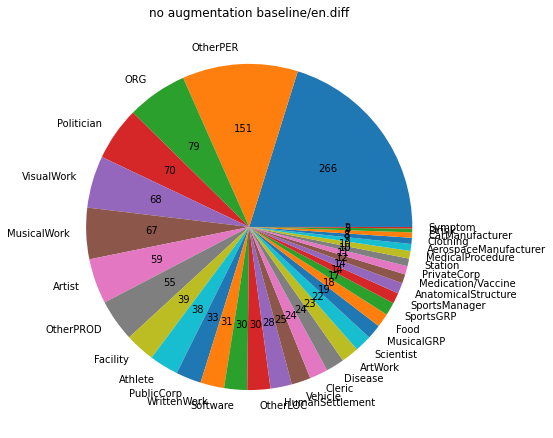


base_en_20.diff
~~~pairs
(('OtherPER', 'Artist'), 35)
(('OtherPROD', ''), 32)
(('VisualWork', ''), 29)
(('ORG', ''), 29)
(('Artist', 'OtherPER'), 27)
(('Politician', 'Artist'), 26)
(('OtherPER', 'Politician'), 25)
(('OtherPER', 'Athlete'), 25)
(('MusicalWork', ''), 23)
(('Politician', 'OtherPER'), 20)
~~~each
('', 207)
('OtherPER', 100)
('ORG', 66)
('Politician', 63)
('Artist', 62)
('MusicalWork', 62)
('OtherPROD', 58)
('VisualWork', 57)
('Facility', 41)
('Athlete', 38)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.80      0.47      0.59        17
  AnatomicalStructure       0.91      0.48      0.62        21
              ArtWork       0.82      0.51      0.63        35
               Artist       0.75      0.87      0.81       429
              Athlete       0.72      0.76      0.74       157
      CarManufacturer       0.81      0.68      0.74        19
               Cler

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


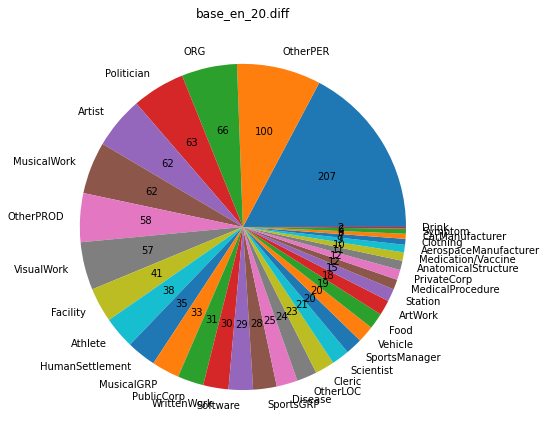


base_en-full_20.diff
~~~pairs
(('Artist', 'OtherPER'), 41)
(('MusicalWork', ''), 36)
(('OtherPER', 'Politician'), 34)
(('VisualWork', ''), 32)
(('OtherPROD', ''), 30)
(('OtherPER', 'Athlete'), 29)
(('', 'MusicalWork'), 27)
(('OtherPER', 'Artist'), 25)
(('ORG', ''), 24)
(('WrittenWork', ''), 23)
~~~each
('', 226)
('OtherPER', 104)
('Artist', 90)
('VisualWork', 78)
('ORG', 71)
('Politician', 58)
('MusicalWork', 57)
('HumanSettlement', 50)
('Athlete', 45)
('Facility', 44)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.75      0.71      0.73        17
  AnatomicalStructure       0.87      0.62      0.72        21
              ArtWork       0.63      0.34      0.44        35
               Artist       0.80      0.81      0.80       429
              Athlete       0.69      0.71      0.70       157
      CarManufacturer       0.64      0.74      0.68        19
               Cleri

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


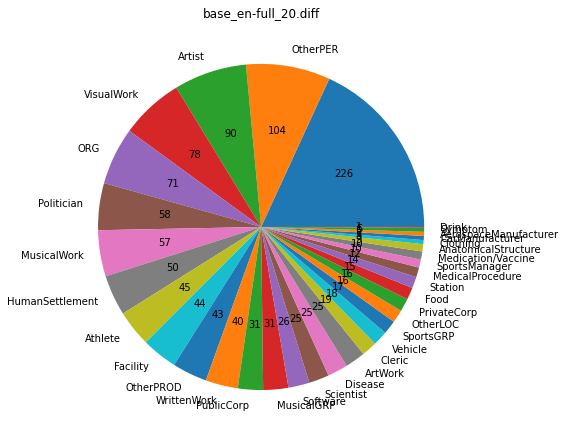


base_en-melm_20.diff
~~~pairs
(('Artist', 'OtherPER'), 45)
(('OtherPER', 'Politician'), 43)
(('Artist', 'Politician'), 38)
(('OtherPER', 'Artist'), 29)
(('OtherPER', 'Athlete'), 28)
(('', 'WrittenWork'), 28)
(('VisualWork', ''), 26)
(('', 'MusicalWork'), 24)
(('', 'ORG'), 22)
(('OtherPROD', ''), 22)
~~~each
('', 277)
('Artist', 124)
('OtherPER', 113)
('VisualWork', 75)
('OtherPROD', 59)
('ORG', 49)
('Politician', 46)
('MusicalWork', 46)
('MusicalGRP', 45)
('Athlete', 45)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.89      0.47      0.62        17
  AnatomicalStructure       0.78      0.33      0.47        21
              ArtWork       0.81      0.49      0.61        35
               Artist       0.75      0.73      0.74       429
              Athlete       0.67      0.71      0.69       157
      CarManufacturer       0.50      0.21      0.30        19
               Cle

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


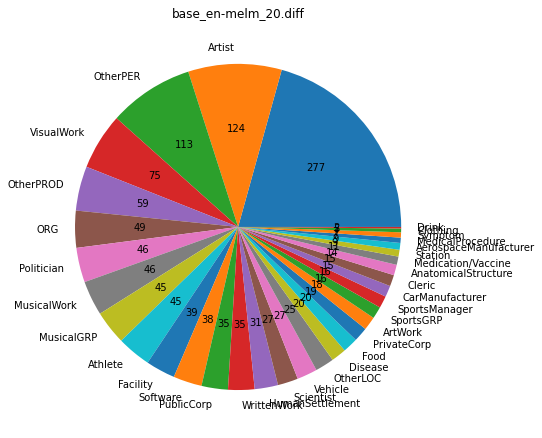


base_en-partial_20.diff
~~~pairs
(('Artist', 'OtherPER'), 62)
(('Politician', 'OtherPER'), 39)
(('OtherPROD', ''), 37)
(('', 'VisualWork'), 29)
(('ORG', ''), 28)
(('', 'ORG'), 26)
(('MusicalWork', ''), 25)
(('VisualWork', ''), 25)
(('Artist', 'Athlete'), 24)
(('WrittenWork', ''), 20)
~~~each
('', 239)
('Artist', 135)
('ORG', 71)
('Politician', 70)
('MusicalWork', 69)
('OtherPER', 62)
('OtherPROD', 57)
('VisualWork', 55)
('Athlete', 49)
('Facility', 40)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.67      0.71      0.69        17
  AnatomicalStructure       0.75      0.43      0.55        21
              ArtWork       0.93      0.37      0.53        35
               Artist       0.84      0.72      0.77       429
              Athlete       0.64      0.69      0.67       157
      CarManufacturer       0.86      0.63      0.73        19
               Cleric       0.38     

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


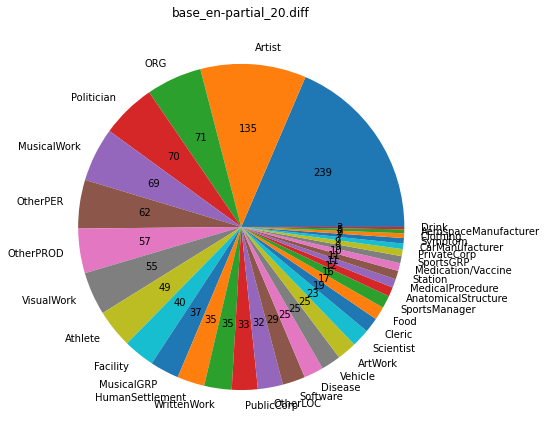


base_en-stable-full_20.diff
~~~pairs
(('Artist', 'OtherPER'), 87)
(('OtherPROD', ''), 32)
(('Politician', 'OtherPER'), 31)
(('OtherPER', 'Politician'), 30)
(('ORG', ''), 27)
(('Disease', ''), 26)
(('VisualWork', ''), 25)
(('Software', 'VisualWork'), 23)
(('WrittenWork', ''), 22)
(('MusicalWork', ''), 22)
~~~each
('', 174)
('Artist', 138)
('OtherPER', 98)
('MusicalWork', 73)
('ORG', 60)
('Politician', 58)
('OtherPROD', 55)
('Athlete', 51)
('VisualWork', 51)
('MusicalGRP', 39)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.80      0.71      0.75        17
  AnatomicalStructure       0.90      0.43      0.58        21
              ArtWork       0.71      0.57      0.63        35
               Artist       0.79      0.69      0.74       429
              Athlete       0.75      0.68      0.71       157
      CarManufacturer       0.60      0.47      0.53        19
              

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


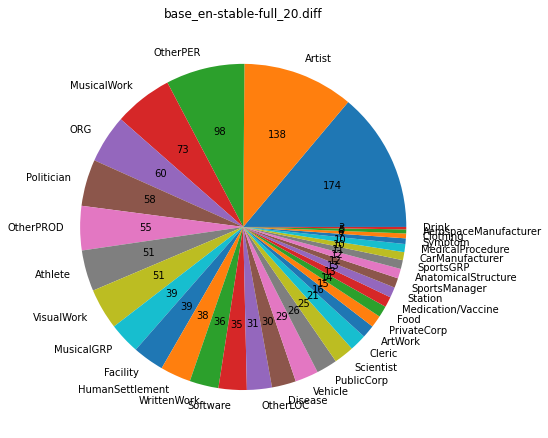


base_en-stable-partial_20.diff
~~~pairs
(('OtherPER', 'Artist'), 39)
(('MusicalWork', ''), 33)
(('OtherPER', 'Politician'), 31)
(('VisualWork', ''), 31)
(('ORG', ''), 29)
(('Politician', 'OtherPER'), 28)
(('OtherPER', 'Athlete'), 24)
(('Artist', 'OtherPER'), 24)
(('', 'WrittenWork'), 24)
(('', 'VisualWork'), 22)
~~~each
('', 214)
('OtherPER', 112)
('Artist', 86)
('ORG', 76)
('MusicalWork', 64)
('VisualWork', 61)
('Politician', 58)
('Facility', 55)
('Athlete', 50)
('OtherPROD', 46)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.50      0.65      0.56        17
  AnatomicalStructure       0.92      0.52      0.67        21
              ArtWork       1.00      0.46      0.63        35
               Artist       0.75      0.82      0.78       429
              Athlete       0.66      0.69      0.67       157
      CarManufacturer       0.71      0.63      0.67        19
        

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


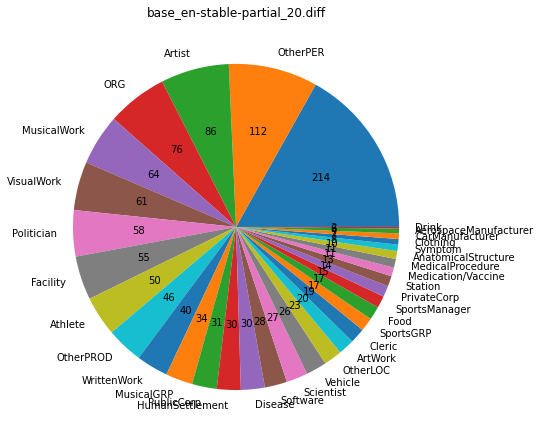


no augmentation baseline/fr.diff
~~~pairs
(('WrittenWork', ''), 41)
(('Artist', 'OtherPER'), 39)
(('Politician', 'OtherPER'), 38)
(('', 'VisualWork'), 27)
(('', 'WrittenWork'), 26)
(('', 'ORG'), 24)
(('OtherPER', 'Artist'), 22)
(('', 'Facility'), 21)
(('ArtWork', ''), 21)
(('', 'HumanSettlement'), 20)
~~~each
('', 246)
('Artist', 86)
('Politician', 85)
('OtherPER', 85)
('ORG', 68)
('WrittenWork', 65)
('Facility', 52)
('Athlete', 41)
('HumanSettlement', 39)
('VisualWork', 30)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.50      0.53      0.52        15
  AnatomicalStructure       1.00      0.52      0.69        21
              ArtWork       0.65      0.38      0.48        40
               Artist       0.82      0.78      0.80       378
              Athlete       0.68      0.71      0.70       139
      CarManufacturer       0.80      0.40      0.53        20
              

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


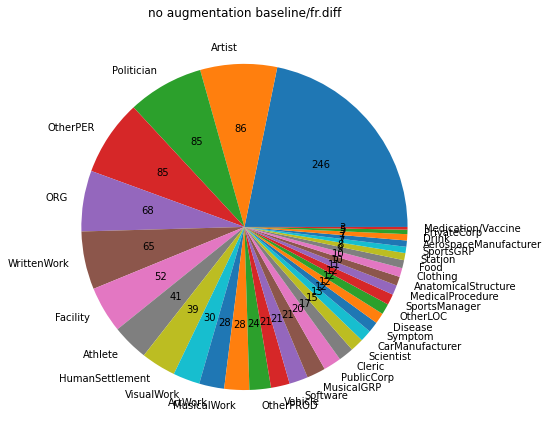


base_fr_20.diff
~~~pairs
(('OtherPER', 'Artist'), 48)
(('Politician', 'OtherPER'), 48)
(('Artist', 'OtherPER'), 40)
(('WrittenWork', ''), 37)
(('', 'WrittenWork'), 36)
(('ORG', ''), 23)
(('', 'VisualWork'), 22)
(('OtherPER', 'Athlete'), 19)
(('VisualWork', ''), 19)
(('HumanSettlement', ''), 18)
~~~each
('', 214)
('OtherPER', 107)
('Artist', 87)
('Politician', 84)
('ORG', 70)
('WrittenWork', 65)
('HumanSettlement', 48)
('Facility', 40)
('VisualWork', 34)
('Athlete', 33)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.53      0.67      0.59        15
  AnatomicalStructure       0.93      0.67      0.78        21
              ArtWork       1.00      0.35      0.52        40
               Artist       0.77      0.78      0.77       378
              Athlete       0.71      0.76      0.74       139
      CarManufacturer       0.67      0.30      0.41        20
               Cleri

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


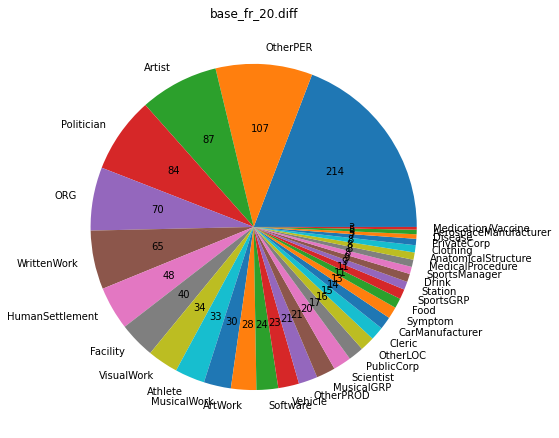


base_fr-full_20.diff
~~~pairs
(('Artist', 'OtherPER'), 90)
(('Politician', 'OtherPER'), 58)
(('', 'WrittenWork'), 51)
(('WrittenWork', ''), 45)
(('', 'ORG'), 35)
(('Athlete', 'OtherPER'), 34)
(('VisualWork', ''), 29)
(('', 'OtherPROD'), 27)
(('', 'VisualWork'), 25)
(('ArtWork', ''), 23)
~~~each
('', 244)
('Artist', 128)
('Politician', 101)
('OtherPER', 72)
('ORG', 70)
('WrittenWork', 60)
('HumanSettlement', 56)
('Athlete', 52)
('VisualWork', 37)
('Facility', 33)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.67      0.53      0.59        15
  AnatomicalStructure       0.74      0.67      0.70        21
              ArtWork       0.64      0.40      0.49        40
               Artist       0.84      0.67      0.75       378
              Athlete       0.79      0.63      0.70       139
      CarManufacturer       0.62      0.40      0.48        20
               Cleric      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


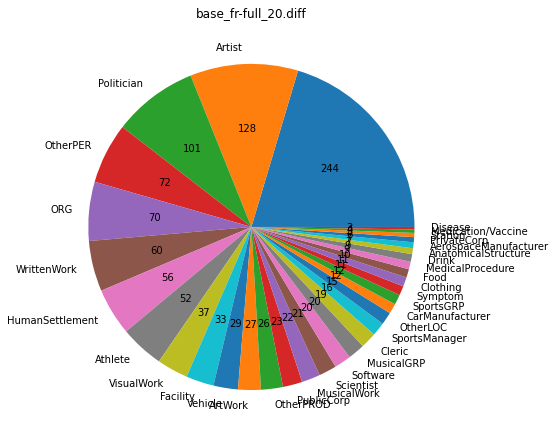


base_fr-melm_20.diff
~~~pairs
(('Politician', 'OtherPER'), 39)
(('', 'WrittenWork'), 38)
(('WrittenWork', ''), 36)
(('Artist', 'OtherPER'), 36)
(('OtherPER', 'Artist'), 36)
(('', 'ORG'), 27)
(('ORG', ''), 26)
(('', 'VisualWork'), 25)
(('', 'HumanSettlement'), 24)
(('VisualWork', ''), 22)
~~~each
('', 251)
('Artist', 102)
('Politician', 99)
('OtherPER', 98)
('ORG', 67)
('WrittenWork', 64)
('HumanSettlement', 56)
('OtherPROD', 46)
('Facility', 37)
('VisualWork', 35)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.37      0.47      0.41        15
  AnatomicalStructure       0.86      0.57      0.69        21
              ArtWork       0.44      0.28      0.34        40
               Artist       0.77      0.75      0.76       378
              Athlete       0.64      0.75      0.69       139
      CarManufacturer       0.43      0.50      0.47        20
               Cleric    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


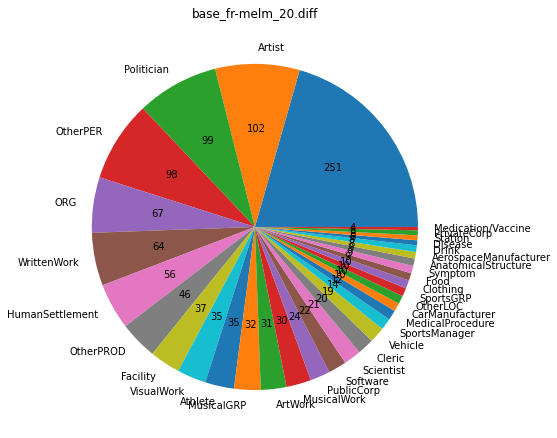


base_fr-partial_20.diff
~~~pairs
(('', 'ORG'), 51)
(('WrittenWork', ''), 44)
(('Politician', 'OtherPER'), 41)
(('', 'WrittenWork'), 29)
(('ORG', ''), 29)
(('OtherPER', 'Artist'), 24)
(('ArtWork', ''), 22)
(('Artist', 'OtherPER'), 21)
(('OtherPER', 'Scientist'), 20)
(('', 'Artist'), 18)
~~~each
('', 246)
('OtherPER', 101)
('Artist', 76)
('Politician', 75)
('WrittenWork', 64)
('ORG', 57)
('HumanSettlement', 45)
('Athlete', 43)
('OtherPROD', 30)
('VisualWork', 27)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.58      0.47      0.52        15
  AnatomicalStructure       0.93      0.62      0.74        21
              ArtWork       0.78      0.35      0.48        40
               Artist       0.83      0.81      0.82       378
              Athlete       0.70      0.69      0.69       139
      CarManufacturer       0.70      0.70      0.70        20
               Cleric       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


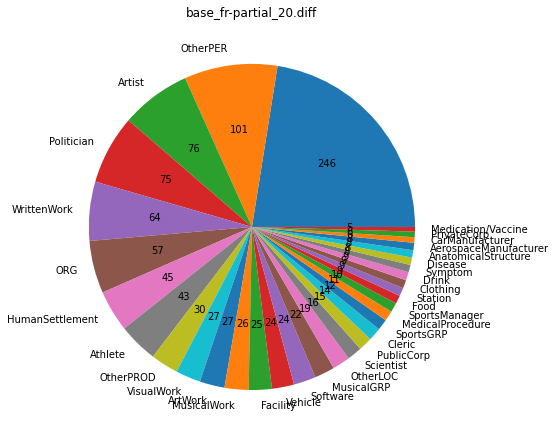


base_fr-stable-full_20.diff
~~~pairs
(('', 'WrittenWork'), 49)
(('Politician', 'OtherPER'), 39)
(('WrittenWork', ''), 38)
(('ORG', ''), 36)
(('Artist', 'OtherPER'), 33)
(('OtherPER', 'Politician'), 26)
(('Artist', 'Politician'), 24)
(('', 'HumanSettlement'), 21)
(('OtherPER', 'Artist'), 21)
(('VisualWork', ''), 20)
~~~each
('', 244)
('OtherPER', 104)
('Artist', 103)
('Politician', 85)
('ORG', 79)
('WrittenWork', 67)
('HumanSettlement', 51)
('Facility', 38)
('VisualWork', 34)
('Athlete', 28)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.43      0.40      0.41        15
  AnatomicalStructure       1.00      0.62      0.76        21
              ArtWork       0.88      0.38      0.53        40
               Artist       0.83      0.74      0.78       378
              Athlete       0.69      0.80      0.74       139
      CarManufacturer       0.82      0.70      0.76        2

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


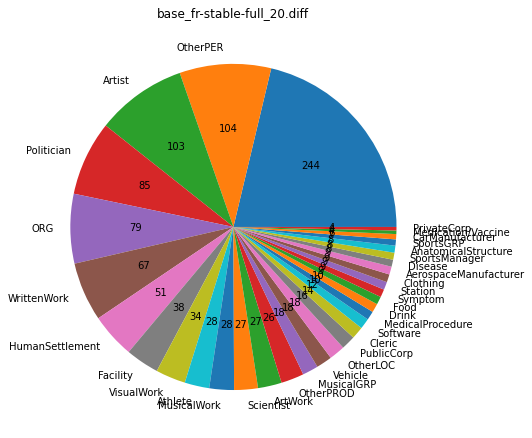


base_fr-stable-partial_20.diff
~~~pairs
(('WrittenWork', ''), 42)
(('Politician', 'OtherPER'), 40)
(('', 'WrittenWork'), 39)
(('OtherPER', 'Artist'), 33)
(('Artist', 'OtherPER'), 31)
(('ORG', ''), 27)
(('VisualWork', ''), 25)
(('SportsManager', 'Athlete'), 25)
(('', 'VisualWork'), 23)
(('ArtWork', ''), 23)
~~~each
('', 198)
('Artist', 93)
('OtherPER', 83)
('Politician', 83)
('WrittenWork', 71)
('ORG', 70)
('HumanSettlement', 50)
('OtherPROD', 34)
('VisualWork', 33)
('Athlete', 32)
                       precision    recall  f1-score   support

                            0.00      0.00      0.00         0
AerospaceManufacturer       0.62      0.67      0.65        15
  AnatomicalStructure       0.89      0.76      0.82        21
              ArtWork       0.52      0.30      0.38        40
               Artist       0.79      0.76      0.77       378
              Athlete       0.62      0.78      0.69       139
      CarManufacturer       0.70      0.70      0.70        20
        

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


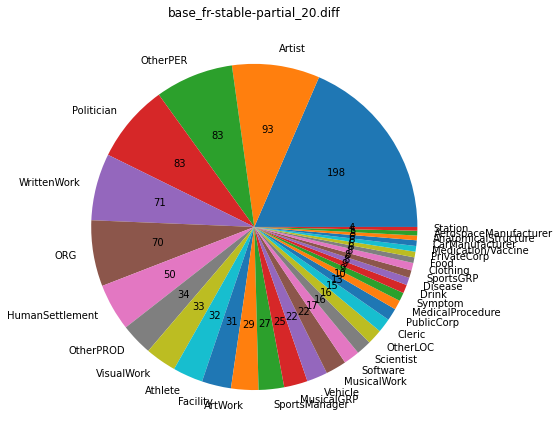

In [49]:
plt.rcParams['figure.figsize'] = (7.5,7.5)

for file in diff_files:
  (real, real_combined, pred, pred_combined,
   real_without_O, real_without_O_combined, pred_without_real_O, pred_without_real_O_combined,
   real_mistake_combined, pred_mistake_combined,
   pairs_same, pairs_diff, pairs_same_combined, pairs_diff_combined,
   # pairs_diff_unordered, pairs_diff_combined_unordered,
   each_diff, each_diff_combined) = get_counter_from_diff(path + file)
  
  print(file)
  print('~~~pairs')
  # print(*pairs_diff_combined_unordered.most_common(10), sep='\n') # REMOVE, CONFUSES GROUND TRUTH AND PREDICTIONS
  print(*pairs_diff_combined.most_common(10), sep='\n')
  print('~~~each')
  print(*each_diff_combined.most_common(10), sep='\n')

  print( classification_report(real_without_O_combined, pred_without_real_O_combined) ) # real_without_O, pred_without_real_O # real_without_O_combined, pred_without_real_O_combined # real, pred # real_combined, pred_combined

  keys = [key for (key, val) in each_diff_combined.most_common()]
  values = [val for (key, val) in each_diff_combined.most_common()]

  plt.title(file)
  plt.pie(x=values, labels=keys, autopct= lambda x: '{val:.0f}'.format(val=x*sum(values)/100) )
  # autopct= lambda x: '{pct:.2f}% ({val:.0f})'.format(pct=x, val=x*sum(values)/100)
  plt.show()

  print()